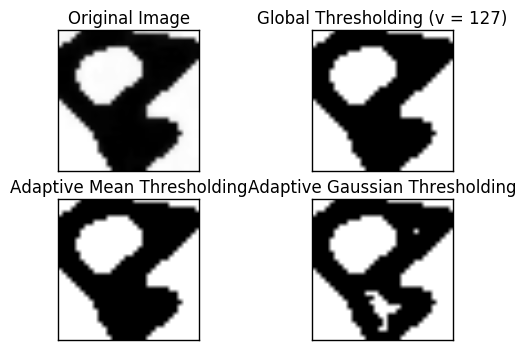

In [36]:
import cv2
import numpy as np
import glob
import fnmatch
import os

from matplotlib import pyplot as plt
im= cv2.imread("E:/10/Pictures/4/bn00004.jpg",0)
img = cv2.medianBlur(im,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,127,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,20,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)','Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [50]:
import cv2
import numpy as np
import glob
import fnmatch
import os
dirpath = 'E:/10/Pictures/9/'
var =  len(fnmatch.filter(os.listdir(dirpath), '*.jpg'))
ap = []
params = cv2.SimpleBlobDetector_Params()
 
# Change thresholds
params.minThreshold = 0;
params.maxThreshold = 255;
 
# Filter by Area.
params.filterByArea = True
params.minArea = 2
 
# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1
 
# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.70
 
# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01
# Set up the detector with default parameters.
# Read image
for img in glob.glob("E:/10/Pictures/9/*.jpg"):
    im = cv2.imread(img)
    image = cv2.resize(im, (100, 100))
    
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    (thresh, im_bw) = cv2.threshold(imgray, 120, 255, cv2.THRESH_BINARY)
    
    
 
# Detect blobs.
    detector = cv2.SimpleBlobDetector_create(params)
    keypoints = detector.detect(imgray)
    #ar =  len(keypoints)
    #ap.append(keypoints)

    ar =len(keypoints)
    print(ar)
    

10
7
7
13
7
12
12
4
16
10
10
9


In [67]:
print(ap)

[7, 8, 14, 7, 7, 7, 17, 8, 10, 11, 5, 10]


In [22]:

"""
============
Thresholding
============

Thresholding is used to create a binary image. This example uses Otsu's method
to calculate the threshold value.

Otsu's method calculates an "optimal" threshold (marked by a red line in the
histogram below) by maximizing the variance between two classes of pixels,
which are separated by the threshold. Equivalently, this threshold minimizes
the intra-class variance.from skimage.filters import threshold_otsu, threshold_adaptive

.. [1] http://en.wikipedia.org/wiki/Otsu's_method

"""
import csv
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import scipy
import os
from scipy import ndimage
import glob
import math
import fnmatch
ap = []

for img in glob.glob("E:/10/Pictures/9/*.jpg"):
    image = cv2.imread(img)
    dirpath = 'E:/10/Pictures/9'
    var =  len(fnmatch.filter(os.listdir(dirpath), '*.jpg'))
    imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    im_gray = cv2.medianBlur(imgray,3)

    #Calculating Average color
 
    

    #ave = sum(avarege_rgb)/ap
    #avaragetotal.append(ave)
    #Transforming image into various binary mode
    (thresh, im_bw) = cv2.threshold(im_gray, 127, 255, cv2.THRESH_BINARY)
    (thresh, im_bw2) = cv2.threshold(im_gray, 150, 255, cv2.THRESH_TRUNC)
    (thresh, im_bw3) = cv2.threshold(im_gray, 127, 255, cv2.THRESH_TOZERO)
    (thresh, im_bw4) = cv2.threshold(im_gray, 127, 255, cv2.THRESH_OTSU)
    (thresh, im_bw5) = cv2.threshold(im_gray, 130, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU )
    (thresh, im_bw6) = cv2.threshold(im_gray, 127, 255, cv2.THRESH_BINARY_INV)
    (thresh, im_bw7) = cv2.threshold(im_gray, 127, 255, cv2.THRESH_TOZERO_INV)

    #Counting nonzero pixels of each transformation
    pix = cv2.countNonZero(im_gray)
    pix1 = cv2.countNonZero(im_bw) 
    pix2 = cv2.countNonZero(im_bw2) 
    pix3 = cv2.countNonZero(im_bw3) 
    pix4 = cv2.countNonZero(im_bw4) 
    pix5 = cv2.countNonZero(im_bw5)
    pix6 = cv2.countNonZero(im_bw6)
    pix7 = cv2.countNonZero(im_bw7)
 
    print(pix2)
    
    

 
    
    #Calculating histogram data in various way
    #print(pix5)

921
920
938
946
899
989
955
961
979
945
983
970


In [52]:
import cv2
import glob
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import scipy
import os
from scipy import ndimage
import glob
import math
import fnmatch
for img in glob.glob("E:/10/Pictures/9/*.jpg"):
    im = cv2.imread(img)
    src = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(src,127,255,cv2.THRESH_BINARY)
    # You need to choose 4 or 8 for connectivity type
    connectivity =8
    # Perform the operation
    output = cv2.connectedComponentsWithStats(thresh, connectivity, cv2.CV_32S)
    # Get the results
    # The first cell is the number of labels
    num_labels = output[0]
    #print("Labels Number ::")
    #print(num_labels)
    # The second cell is the label matrix
    labels = output[1]
    #print("Total Labels ::")
    #print(len(labels))
    # The third cell is the stat matrix
    stats = output[2]
    # The fourth cell is the centroid matrix
    centroids = output[3]
    
    #print(len(labels))
    #print("Total Stats ::")
    #print(len(stats))
    #print("Total Centroids ::")
    result = np.sum(centroids)
    print(result)

  



134.039243637
143.441008987
180.427994802
178.746246264
185.028225621
202.899394886
152.195537875
127.32789762
92.4409783765
177.260484451
256.485188644
238.55672945


In [51]:
print(len(ap))

24


In [53]:
import cv2
import glob
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import scipy
import os
from scipy import ndimage
import glob
import math
import fnmatch
ap = []
for im in glob.glob("E:/10/Pictures/9/*.jpg"):
    img= cv2.imread(im)    
    Gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    connectivity =8
    

    Labelnum, labelimg, contours, GoCs = cv2.connectedComponentsWithStats (Gray, connectivity, cv2.CV_32S)
    #print (np.sum(Labelnum ))
    ar = np.sum(contours)
    print (ar)




1152
1151
1151
1152
1171
1152
1166
1152
1151
1152
1151
1152


In [4]:
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np
import scipy
import os
from sklearn import svm, grid_search
from sklearn.model_selection import train_test_split

# Load dataset
url = "data (1).csv"
names = ['Blob', 'Nonzero_Pixel', 'Centroid','Class']
dataset = pandas.read_csv(url, names = names)
#datasetss = dataset.astype('float32')
#print(dataset.head(50))
# In[13]:
array = dataset.values
X = array[:,0:3]
Y = array[:,3]
#print(X)


url2 = "data.csv"
names =['Blob', 'Nonzero_Pixel', 'Centroid','Class']
dataset2 = pandas.read_csv(url2, names = names)
#print(dataset.head(10))
#print(dataset.describe())

array2 = dataset2.values
X_validation = array2[:,0:3]
Y_validation = array2[:,3]
#print(X_validation)


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn import model_selection
#C = 0.7
#validation_size = 0.30
#seed = 7
#X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
svc = svm.SVC(kernel= 'rbf', C = 10).fit(X, Y)
predictions = svc.predict(X_validation)
print(predictions)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
print(predictions)

['Zero' 'Zero' 'Zero' 'Zero' 'Zero' 'Zero' 'Zero' 'Zero' 'Zero' 'Zero'
 'One' 'One' 'One' 'One' 'One' 'One' 'One' 'One' 'One' 'One' 'Two' 'Two'
 'Two' 'Two' 'Two' 'Two' 'Two' 'Two' 'Two' 'Two' 'Three' 'Three' 'Three'
 'Three' 'Three' 'Three' 'Three' 'Three' 'Three' 'Three' 'Three' 'Three'
 'Two' 'Two' 'Two' 'Two' 'Two' 'Two' 'Two' 'Two' 'Two' 'Two' 'Two' 'Two'
 'Two' 'Two' 'Two' 'Two' 'Two' 'Two' 'Two' 'Zero' 'Zero' 'Two' 'Zero' 'Two'
 'Two' 'Two' 'Two' 'Three' 'Two' 'Two' 'Two' 'One' 'Two' 'Two' 'Two' 'Two'
 'Two' 'Two' 'Two' 'Two' 'Two' 'Two' 'Two' 'Two' 'Two' 'Three' 'Two' 'Two'
 'Two' 'Two' 'Two' 'Two' 'Two' 'Two' 'Two' 'Two' 'Three' 'Two' 'Two' 'Two']
0.411764705882
[[ 0  0  0  0  0  0  0  1  9  0]
 [ 0  0  0  0  0  0  0  0  9  1]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  1  9  0]
 [ 0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  1  7  2]
 [ 0  0  0  0  0  0  0 12  0  0]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0 

C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
print(accuracy_score(Y_validation, predictions))

0.357142857143


In [4]:
print(dataset.groupby('Class').size())

Class
Eight    10
Five     10
Four     10
Nine     10
One      10
Seven    10
Six      10
Three    12
Two      10
Zero     10
dtype: int64


In [6]:
array = dataset.values
X = array[:,0:3]
Y = array[:,3]
print(X)

[[10 493 188.3794888]
 [8 544 183.87581200000002]
 [9 442 191.2080569]
 [7 606 185.54387690000001]
 [8 599 181.83888159999998]
 [3 422 191.3109596]
 [10 629 176.57817350000002]
 [8 501 158.0480671]
 [10 494 182.1708379]
 [8 649 188.5374229]
 [7 701 179.9617234]
 [6 655 147.261363]
 [9 670 168.1782693]
 [5 667 170.362867]
 [14 764 166.1652251]
 [9 609 183.09596000000002]
 [5 712 126.10293459999998]
 [7 634 210.304113]
 [9 531 173.6620014]
 [7 585 172.81881719999998]
 [7 691 154.9091346]
 [8 677 185.41696230000002]
 [14 725 139.0652242]
 [7 811 152.4335632]
 [7 755 173.28039730000003]
 [17 814 217.1065562]
 [7 746 126.9584861]
 [8 787 211.1488699]
 [10 758 154.9345959]
 [11 766 217.91454530000001]
 [6 762 232.49046890000002]
 [10 659 212.69925120000002]
 [5 669 187.0917901]
 [22 870 148.2537872]
 [8 683 147.1188766]
 [8 559 175.2879056]
 [10 659 212.69925120000002]
 [5 669 187.0917901]
 [8 680 152.2834645]
 [8 586 179.50300900000002]
 [9 652 152.73067340000003]
 [11 750 152.3241737]
 [9 

In [3]:
print(Y)

['Zero' 'Zero' 'Zero' 'Zero' 'Zero' 'Zero' 'Zero' 'One' 'One' 'One' 'One'
 'One' 'One' 'One' 'One' 'Two' 'Two' 'Two' 'Two' 'Two' 'Two' 'Two' 'Three'
 'Three' 'Three' 'Three' 'Three' 'Three' 'Three' 'Three' 'Three' 'Three'
 'Four' 'Four' 'Four' 'Four' 'Four' 'Four' 'Five' 'Five' 'Five' 'Five'
 'Five' 'Five' 'Five' 'Six' 'Six' 'Six' 'Six' 'Six' 'Six' 'Six' 'Seven'
 'Seven' 'Seven' 'Seven' 'Seven' 'Seven' 'Seven' 'Seven' 'Eight' 'Eight'
 'Eight' 'Eight' 'Eight' 'Eight' 'Nine' 'Nine' 'Nine' 'Nine' 'Nine' 'Nine'
 'Nine' 'Nine' 'Zero' 'Zero' 'Zero' 'One' 'One' 'Two' 'Two' 'Two' 'Three'
 'Three' 'Four' 'Four' 'Four' 'Four' 'Five' 'Five' 'Five' 'Six' 'Six' 'Six'
 'Seven' 'Seven' 'Eight' 'Eight' 'Eight' 'Eight' 'Nine' 'Nine']


In [15]:

url2 = "valid.csv"
names =['Blob', 'Nonzero_Pixel', 'Centroid','Class']
dataset2 = pandas.read_csv(url2, names = names)
#print(dataset.head(10))
#print(dataset.describe())

array2 = dataset2.values
X_validation = array2[:,0:3]
Y_validation = array2[:,3]
print(X_validation)


[[9 442 191.2080569]
 [7 606 185.54387690000001]
 [8 599 181.83888159999998]
 [14 764 166.1652251]
 [9 609 183.09596000000002]
 [7 811 152.4335632]
 [7 755 173.28039730000003]
 [17 814 217.1065562]
 [10 659 212.69925120000002]
 [5 669 187.0917901]
 [5 359 219.94888199999997]
 [6 405 211.92263309999998]
 [7 484 211.9737853]
 [7 361 195.5320234]
 [6 690 184.98075419999998]
 [9 601 172.13601]
 [7 672 180.88023169999997]
 [5 607 189.2214506]
 [5 664 145.4555219]
 [8 619 151.4827878]
 [9 630 183.90996280000002]
 [10 866 160.0316548]
 [6 740 124.84535690000001]
 [4 717 146.2756378]
 [3 741 150.0580202]
 [7 681 155.5726928]
 [13 730 178.74624630000002]
 [7 685 185.0282256]]


In [7]:
print(Y_validation)

['Zero' 'Zero' 'Zero' 'One' 'One' 'Two' 'Two' 'Two' 'Three' 'Three' 'Four'
 'Four' 'Four' 'Four' 'Five' 'Five' 'Five' 'Six' 'Six' 'Six' 'Seven'
 'Seven' 'Eight' 'Eight' 'Eight' 'Eight' 'Nine' 'Nine']


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn import model_selection

#validation_size = 0.30
#seed = 7
#X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
svc = svm.SVC(kernel='linear').fit(X, Y)
predictions = svc.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


# In[10]:

#print(predictions)


# In[ ]:



0.107142857143
[[0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 3 0]]
             precision    recall  f1-score   support

      Eight       0.00      0.00      0.00         4
       Five       0.00      0.00      0.00         3
       Four       0.00      0.00      0.00         4
       Nine       0.00      0.00      0.00         2
        One       0.00      0.00      0.00         2
      Seven       0.00      0.00      0.00         2
        Six       0.00      0.00      0.00         3
      Three       0.00      0.00      0.00         2
        Two       0.11      1.00      0.19         3
       Zero       0.00      0.00      0.00         3

avg / total       0.01      0.11      0.02        28



C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
